In [2]:
import pandas as pd  # Importing pandas for data manipulation
import numpy as np  # Importing numpy for numerical computations
import torch  # Importing PyTorch for machine learning
import torch.nn as nn  # Importing neural network module from PyTorch
import torch.nn.functional as F  # Importing neural network functions from PyTorch
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization

In [3]:
df = pd.read_csv('forestfires.csv')  # Read data from a CSV file into a DataFrame called 'df'
df.head(15)  # Display 

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


###  Expected output: 
data should consists of 517 rows with 8 attribute: 
- 8 floats 
- 3 integers 
- 2 strings 

In [5]:
df['log_area'] = np.log1p(df['area'])  # Calculate the natural logarithm of (area + 1) and add it as a new column 'log_area

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.000000
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.000000
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.000000
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.000000
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,2.006871
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,4.012592
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,2.498152
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.000000


In [6]:
df.drop(['area'], axis=1 , inplace=True) #drop area column 
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,log_area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00000,7.000000,9.00000
Y,517.0,4.299807,1.229900,2.0,4.0,4.00000,5.000000,9.00000
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60000,92.900000,96.20000
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30000,142.400000,291.30000
DC,517.0,547.940039,248.066192,7.9,437.7,664.20000,713.900000,860.60000
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40000,10.800000,56.10000
temp,517.0,18.889168,5.806625,2.2,15.5,19.30000,22.800000,33.30000
RH,517.0,44.288201,16.317469,15.0,33.0,42.00000,53.000000,100.00000
wind,517.0,4.017602,1.791653,0.4,2.7,4.00000,4.900000,9.40000
rain,517.0,0.021663,0.295959,0.0,0.0,0.00000,0.000000,6.40000


In [8]:
from sklearn.preprocessing import MinMaxScaler  # Import scaling tool
minmaxscaler = MinMaxScaler()  # Create scaler
data_scaled = df[['FFMC', 'DMC', 'DC', 'ISI', 'temp']]  # Select columns to scale
data_scaled = minmaxscaler.fit_transform(data_scaled)  # Scale selected columns
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,log_area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000


In [29]:
df.corr() # no high corr so we can take any feature

C:\Users\ziadg\AppData\Local\Temp\ipykernel_16468\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,log_area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.061995
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.038838
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.046799
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.067153
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.066360
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,-0.010347
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.053487
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.053662
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.066973
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,0.023311


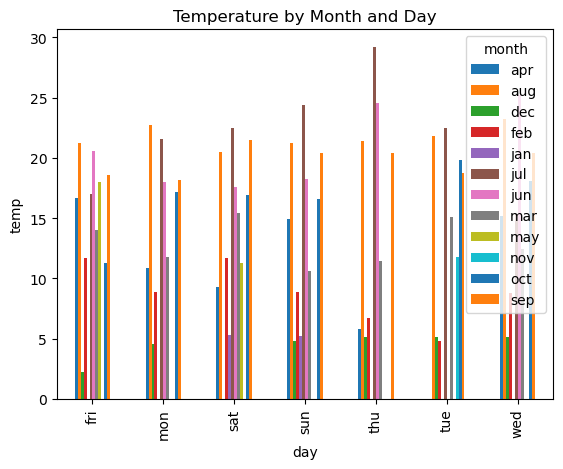

In [9]:
T=df.groupby(['month', 'day'])['temp'].mean().reset_index()
pivot_data = T.pivot(index='day', columns='month', values='temp')
pivot_data.plot(kind='bar')
plt.title('Temperature by Month and Day')
plt.xlabel('day')
plt.ylabel('temp')
plt.show()

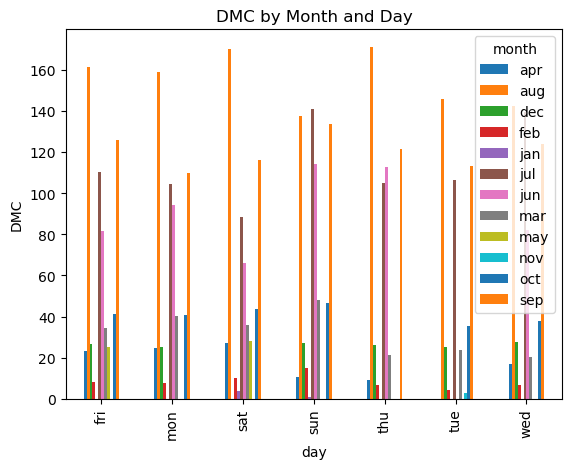

In [65]:
T=df.groupby(['month', 'day'])['DMC'].mean().reset_index()
pivot_data = T.pivot(index='day', columns='month', values='DMC')
pivot_data.plot(kind='bar')
plt.title('DMC by Month and Day')
plt.xlabel('day')
plt.ylabel('DMC')
plt.show()

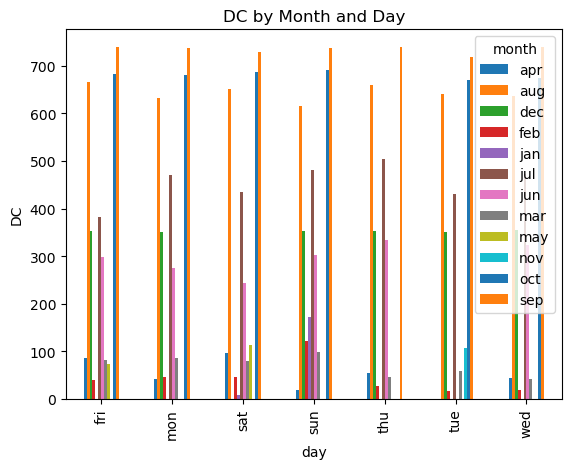

In [66]:
T=df.groupby(['month', 'day'])['DC'].mean().reset_index()
pivot_data = T.pivot(index='day', columns='month', values='DC')
pivot_data.plot(kind='bar')
plt.title('DC by Month and Day')
plt.xlabel('day')
plt.ylabel('DC')
plt.show()

In [ ]:
#so select the features due to the chart as (x,y,temp,DMC,DC)

In [10]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'log_area'],
      dtype='object')

In [34]:
features_columns = [0, 1, 5, 6, 8]  # List of column indices to select
x = df.iloc[:, features_columns]  # Select specific columns from the DataFrame for input features
y = df['log_area']  # Select the 'log_area' column as the target variable

In [37]:
from sklearn.model_selection import train_test_split  # Import train_test_split function
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape  # Show the shapes of training and testing sets

((361, 5), (156, 5))

In [38]:
# Convert numpy array to a PyTorch tensor
X_train_tensor = torch.tensor(X_train.to_numpy())
y_train_tensor = torch.tensor(y_train.to_numpy())
X_test_tensor = torch.tensor(X_test.to_numpy())
y_test_tensor = torch.tensor(y_test.to_numpy())

In [1]:
class Net(nn.Module):  # Define a neural network class inheriting from nn.Module
    def __init__(self):  # Constructor to set up the network architecture
        super(Net, self).__init__()  # Call the parent class constructor
        self.fc1 = nn.Linear(5, 10)  # Define a fully connected layer from 5 input features to 10 units
        self.fc2 = nn.Linear(10, 6)  
        self.fc3 = nn.Linear(6, 1)  
    def forward(self, x):  # Forward method defining the flow of data through the network
        x = self.fc1(x)  
        x = F.relu(x)  # Apply ReLU activation
        x = self.fc2(x)  
        x = F.relu(x)  
        x = self.fc3(x)  
        return x  # Return the final output
net = Net() 
net 

NameError: name 'nn' is not defined

In [56]:
from torch import optim  # Import the optimizer module from PyTorch
optimizer = optim.SGD(net.parameters(), lr=0.0000001)  # Define a stochastic gradient descent optimizer
criterion = nn.MSELoss()  # Define the mean squared error loss function


In [63]:
def fullPass(data, labels):
    running_loss = 0.0
    for i in range(0, data.size()[0]):
        optimizer.zero_grad()
        
        data_i = data[i].float()  
        labels_i = labels[i].float()  
        
        outputs = net(data_i)
        loss = criterion(outputs, labels_i)
        
        # Add L2 regularization term to the loss
        l2_reg = 0.0
        for param in net.parameters():
            l2_reg += torch.norm(param)
        loss += 0.5 * weight_decay * l2_reg
        
        loss.backward()
        optimizer.step()
        running_loss += loss.item()  # Use loss.item() to get the loss value
        
        if (i + 1) % batch_size == 0:
            print((epoch + 1, i + 1, running_loss / batch_size))
            running_loss = 0.0

net.train()
batch_size = 32  # Choose an appropriate batch size
weight_decay = 0.001  # Choose an appropriate weight decay value

for epoch in range(600):
    fullPass(X_train_tensor, y_train_tensor) # some function here i copied like l2 and batch codes

(1, 32, 1.7171429202426225)
(1, 64, 1.3639713779557496)
(1, 96, 1.762679333332926)
(1, 128, 2.7236586292274296)
(1, 160, 2.310911493957974)
(1, 192, 1.8949793125502765)
(1, 224, 1.069454305106774)
(1, 256, 2.3595746868522838)
(1, 288, 2.2771697530988604)
(1, 320, 2.1221331119304523)
(1, 352, 1.1455665040994063)
(2, 32, 1.7171413809992373)
(2, 64, 1.363972444087267)
(2, 96, 1.7626782145816833)
(2, 128, 2.723659230163321)
(2, 160, 2.310913913883269)
(2, 192, 1.8949788040481508)
(2, 224, 1.0694505858700722)
(2, 256, 2.3595772257540375)
(2, 288, 2.2771714741829783)
(2, 320, 2.1221346489619464)
(2, 352, 1.145563637604937)
(3, 32, 1.7171399703947827)
(3, 64, 1.3639734571333975)
(3, 96, 1.7626770911738276)
(3, 128, 2.7236599505413324)
(3, 160, 2.310916291899048)
(3, 192, 1.8949783898424357)
(3, 224, 1.0694468553410843)
(3, 256, 2.3595798646565527)
(3, 288, 2.2771731924731284)
(3, 320, 2.12213628704194)
(3, 352, 1.1455608359538019)
(4, 32, 1.7171384384855628)
(4, 64, 1.3639745474793017)
(4, 96

(27, 160, 2.310973960789852)
(27, 192, 1.8949687368003651)
(27, 224, 1.0693575262557715)
(27, 256, 2.359642493422143)
(27, 288, 2.2772144416812807)
(27, 320, 2.1221747004892677)
(27, 352, 1.145493071526289)
(28, 32, 1.7171030302997679)
(28, 64, 1.363999429740943)
(28, 96, 1.7626488455571234)
(28, 128, 2.7236782028339803)
(28, 160, 2.3109764005057514)
(28, 192, 1.894968360546045)
(28, 224, 1.0693537826882675)
(28, 256, 2.35964502079878)
(28, 288, 2.2772163737099618)
(28, 320, 2.122176375472918)
(28, 352, 1.1454902305267751)
(29, 32, 1.717101629357785)
(29, 64, 1.3640004146145657)
(29, 96, 1.762647737050429)
(29, 128, 2.7236790012102574)
(29, 160, 2.3109787688590586)
(29, 192, 1.8949680379591882)
(29, 224, 1.0693500811466947)
(29, 256, 2.359647667966783)
(29, 288, 2.2772179287858307)
(29, 320, 2.1221779205370694)
(29, 352, 1.1454874547198415)
(30, 32, 1.7171001026872545)
(30, 64, 1.3640015023993328)
(30, 96, 1.7626466252841055)
(30, 128, 2.7236796563956887)
(30, 160, 2.3109811928588897)


(52, 320, 2.1222142471233383)
(52, 352, 1.1454233675030991)
(53, 32, 1.7170666415477172)
(53, 64, 1.364024982554838)
(53, 96, 1.7626209147274494)
(53, 128, 2.7236961205489933)
(53, 160, 2.311035778489895)
(53, 192, 1.894958365475759)
(53, 224, 1.0692619788460433)
(53, 256, 2.3597093702992424)
(53, 288, 2.2772586490027606)
(53, 320, 2.1222157831070945)
(53, 352, 1.1454206375638023)
(54, 32, 1.7170652063796297)
(54, 64, 1.3640260213287547)
(54, 96, 1.7626198283396661)
(54, 128, 2.7236968229990453)
(54, 160, 2.3110380496364087)
(54, 192, 1.8949579562759027)
(54, 224, 1.0692583307391033)
(54, 256, 2.3597119336482137)
(54, 288, 2.277260328643024)
(54, 320, 2.122217287425883)
(54, 352, 1.1454178601270542)
(55, 32, 1.7170638132374734)
(55, 64, 1.3640270412433892)
(55, 96, 1.7626187591813505)
(55, 128, 2.723697534762323)
(55, 160, 2.3110403195023537)
(55, 192, 1.8949575762962922)
(55, 224, 1.0692546990467235)
(55, 256, 2.3597144468221813)
(55, 288, 2.2772621233016253)
(55, 320, 2.1222189627587

(78, 224, 1.0691709842067212)
(78, 256, 2.3597732266644016)
(78, 288, 2.277300843736157)
(78, 320, 2.1222549190279096)
(78, 352, 1.1453516469337046)
(79, 32, 1.7170292243827134)
(79, 64, 1.3640514647122473)
(79, 96, 1.7625922453589737)
(79, 128, 2.7237146052066237)
(79, 160, 2.3110967634711415)
(79, 192, 1.8949481900781393)
(79, 224, 1.0691673080436885)
(79, 256, 2.3597756803501397)
(79, 288, 2.277302608359605)
(79, 320, 2.122256565024145)
(79, 352, 1.1453488279366866)
(80, 32, 1.7170277441618964)
(80, 64, 1.3640524151269346)
(80, 96, 1.762591106351465)
(80, 128, 2.723715493455529)
(80, 160, 2.3110991172725335)
(80, 192, 1.8949479224393144)
(80, 224, 1.06916367681697)
(80, 256, 2.3597781733842567)
(80, 288, 2.2773042211774737)
(80, 320, 2.1222580851754174)
(80, 352, 1.1453460447955877)
(81, 32, 1.7170262270374224)
(81, 64, 1.3640533805591986)
(81, 96, 1.7625898998230696)
(81, 128, 2.7237160329241306)
(81, 160, 2.3111014501191676)
(81, 192, 1.8949473671382293)
(81, 224, 1.06915998901240

(104, 32, 1.7169932229444385)
(104, 64, 1.3640768504701555)
(104, 96, 1.7625646539963782)
(104, 128, 2.723732580197975)
(104, 160, 2.311155641800724)
(104, 192, 1.8949384416919202)
(104, 224, 1.0690763756865636)
(104, 256, 2.359839478856884)
(104, 288, 2.277344672009349)
(104, 320, 2.1222958067664877)
(104, 352, 1.1452798837563023)
(105, 32, 1.7169917245628312)
(105, 64, 1.3640778529224917)
(105, 96, 1.76256348984316)
(105, 128, 2.7237332528457046)
(105, 160, 2.3111579712713137)
(105, 192, 1.894937954726629)
(105, 224, 1.0690727222245187)
(105, 256, 2.3598421935457736)
(105, 288, 2.2773463220801204)
(105, 320, 2.1222973108524457)
(105, 352, 1.145277134841308)
(106, 32, 1.7169902788009495)
(106, 64, 1.3640789062483236)
(106, 96, 1.7625624681822956)
(106, 128, 2.7237338481936604)
(106, 160, 2.3111603534780443)
(106, 192, 1.8949375585652888)
(106, 224, 1.0690690519986674)
(106, 256, 2.359844699734822)
(106, 288, 2.2773480019532144)
(106, 320, 2.122298807487823)
(106, 352, 1.14527435379568

(128, 288, 2.277385199209675)
(128, 320, 2.1223334532696754)
(128, 352, 1.1452136791776866)
(129, 32, 1.716957174707204)
(129, 64, 1.36410231445916)
(129, 96, 1.7625370626337826)
(129, 128, 2.723750385455787)
(129, 160, 2.311214506276883)
(129, 192, 1.894928579684347)
(129, 224, 1.0689853818621486)
(129, 256, 2.3599034948274493)
(129, 288, 2.277386783156544)
(129, 320, 2.122334972722456)
(129, 352, 1.1452109491219744)
(130, 32, 1.716955716488883)
(130, 64, 1.364103366737254)
(130, 96, 1.7625360265374184)
(130, 128, 2.7237510583363473)
(130, 160, 2.3112169126980007)
(130, 192, 1.8949281985405833)
(130, 224, 1.0689817414386198)
(130, 256, 2.359906051773578)
(130, 288, 2.2773885298520327)
(130, 320, 2.1223364863544703)
(130, 352, 1.1452081709867343)
(131, 32, 1.7169543359195814)
(131, 64, 1.364104399108328)
(131, 96, 1.7625349247828126)
(131, 128, 2.7237517919857055)
(131, 160, 2.3112191697582603)
(131, 192, 1.8949278206564486)
(131, 224, 1.0689781322143972)
(131, 256, 2.359908539801836)


(154, 32, 1.7169212776934728)
(154, 64, 1.3641279176808894)
(154, 96, 1.762509637977928)
(154, 128, 2.723768299911171)
(154, 160, 2.311273445142433)
(154, 192, 1.8949188011465594)
(154, 224, 1.068894524127245)
(154, 256, 2.3599674029974267)
(154, 288, 2.2774290677625686)
(154, 320, 2.122374215279706)
(154, 352, 1.145142039982602)
(155, 32, 1.7169198957271874)
(155, 64, 1.3641289377119392)
(155, 96, 1.7625085758045316)
(155, 128, 2.723768946249038)
(155, 160, 2.3112757339840755)
(155, 192, 1.8949184394441545)
(155, 224, 1.0688908924348652)
(155, 256, 2.359969909186475)
(155, 288, 2.2774307357612997)
(155, 320, 2.122375766164623)
(155, 352, 1.1451392852468416)
(156, 32, 1.7169184756930918)
(156, 64, 1.3641299231676385)
(156, 96, 1.7625074437819421)
(156, 128, 2.723769660340622)
(156, 160, 2.3112781742820516)
(156, 192, 1.8949180347844958)
(156, 224, 1.0688872655155137)
(156, 256, 2.3599725366802886)
(156, 288, 2.2774324498604983)
(156, 320, 2.1223774610552937)
(156, 352, 1.14513654657639

(178, 352, 1.1450759124709293)
(179, 32, 1.716885432251729)
(179, 64, 1.3641534539638087)
(179, 96, 1.7624821928329766)
(179, 128, 2.7237862064503133)
(179, 160, 2.311332347802818)
(179, 192, 1.8949091214453802)
(179, 224, 1.0688036327483132)
(179, 256, 2.360031281830743)
(179, 288, 2.277471308596432)
(179, 320, 2.1224134877556935)
(179, 352, 1.1450731350341812)
(180, 32, 1.7168840048834682)
(180, 64, 1.3641544177662581)
(180, 96, 1.7624810636043549)
(180, 128, 2.7237869147211313)
(180, 160, 2.311334783094935)
(180, 192, 1.894908728892915)
(180, 224, 1.068800000124611)
(180, 256, 2.360033905482851)
(180, 288, 2.2774730334058404)
(180, 320, 2.1224151799688116)
(180, 352, 1.1450704141752794)
(181, 32, 1.7168824991676956)
(181, 64, 1.3641554632922634)
(181, 96, 1.7624799525365233)
(181, 128, 2.723787700291723)
(181, 160, 2.311337278690189)
(181, 192, 1.8949083836050704)
(181, 224, 1.0687963420059532)
(181, 256, 2.3600364909507334)
(181, 288, 2.2774746792856604)
(181, 320, 2.12241668626666

(203, 320, 2.122451325529255)
(203, 352, 1.1450071057770401)
(204, 32, 1.7168496580561623)
(204, 64, 1.364179035415873)
(204, 96, 1.7624548012390733)
(204, 128, 2.7238042135722935)
(204, 160, 2.311391460360028)
(204, 192, 1.894899421138689)
(204, 224, 1.0687128698918968)
(204, 256, 2.3600954086286947)
(204, 288, 2.2775136935524642)
(204, 320, 2.122453039744869)
(204, 352, 1.1450043608201668)
(205, 32, 1.7168481448898092)
(205, 64, 1.364180060219951)
(205, 96, 1.7624536876101047)
(205, 128, 2.723805036395788)
(205, 160, 2.31139392638579)
(205, 192, 1.894899116246961)
(205, 224, 1.0687092060688883)
(205, 256, 2.360097997589037)
(205, 288, 2.27751530893147)
(205, 320, 2.122454591677524)
(205, 352, 1.145001649390906)
(206, 32, 1.7168466811999679)
(206, 64, 1.364181136712432)
(206, 96, 1.7624526219442487)
(206, 128, 2.7238056799396873)
(206, 160, 2.3113962069619447)
(206, 192, 1.8948987090261653)
(206, 224, 1.0687055707676336)
(206, 256, 2.3601005823584273)
(206, 288, 2.27751705609262)
(206

(228, 224, 1.068625656538643)
(228, 256, 2.3601568586891517)
(228, 288, 2.2775543150492013)
(228, 320, 2.122490809764713)
(228, 352, 1.1449383015278727)
(229, 32, 1.7168137348489836)
(229, 64, 1.3642046449240297)
(229, 96, 1.7624273523688316)
(229, 128, 2.723822272848338)
(229, 160, 2.3114505922421813)
(229, 192, 1.8948898722883314)
(229, 224, 1.0686219946946949)
(229, 256, 2.360159419476986)
(229, 288, 2.2775559527799487)
(229, 320, 2.122492350405082)
(229, 352, 1.1449355839286)
(230, 32, 1.7168122701114044)
(230, 64, 1.364205707795918)
(230, 96, 1.7624262941535562)
(230, 128, 2.723822978325188)
(230, 160, 2.3114528690930456)
(230, 192, 1.8948894772911444)
(230, 224, 1.0686183598591015)
(230, 256, 2.360162026830949)
(230, 288, 2.2775576910935342)
(230, 320, 2.1224938745144755)
(230, 352, 1.1449328160379082)
(231, 32, 1.7168109099147841)
(231, 64, 1.3642067306209356)
(231, 96, 1.7624252419918776)
(231, 128, 2.7238236975390464)
(231, 160, 2.311455162591301)
(231, 192, 1.8948891162872314

(253, 128, 2.7238396902102977)
(253, 160, 2.3115072617074475)
(253, 192, 1.8948807074921206)
(253, 224, 1.0685348974075168)
(253, 256, 2.3602209435775876)
(253, 288, 2.277596675325185)
(253, 320, 2.1225302544189617)
(253, 352, 1.1448696022853255)
(254, 32, 1.716777953086421)
(254, 64, 1.364230359904468)
(254, 96, 1.762400028295815)
(254, 128, 2.7238403933588415)
(254, 160, 2.311509527848102)
(254, 192, 1.8948803206440061)
(254, 224, 1.0685312583809718)
(254, 256, 2.360223551164381)
(254, 288, 2.2775984273757786)
(254, 320, 2.122531797969714)
(254, 352, 1.1448668325319886)
(255, 32, 1.7167765829944983)
(255, 64, 1.3642313783057034)
(255, 96, 1.762398983584717)
(255, 128, 2.723841039929539)
(255, 160, 2.3115118232090026)
(255, 192, 1.894879973726347)
(255, 224, 1.0685276442673057)
(255, 256, 2.3602260735351592)
(255, 288, 2.277600233675912)
(255, 320, 2.122533480869606)
(255, 352, 1.1448640616144985)
(256, 32, 1.7167751677334309)
(256, 64, 1.364232384134084)
(256, 96, 1.7623978452757)
(2

(278, 64, 1.364255009801127)
(278, 96, 1.7623737785033882)
(278, 128, 2.7238577164243907)
(278, 160, 2.311566238058731)
(278, 192, 1.8948711621342227)
(278, 224, 1.0684441194171086)
(278, 256, 2.360285073169507)
(278, 288, 2.277639069361612)
(278, 320, 2.1225696202600375)
(278, 352, 1.1448008271399885)
(279, 32, 1.716742243967019)
(279, 64, 1.3642560171429068)
(279, 96, 1.7623727400787175)
(279, 128, 2.723858420504257)
(279, 160, 2.3115685497177765)
(279, 192, 1.8948707283707336)
(279, 224, 1.0684405227657408)
(279, 256, 2.3602875613141805)
(279, 288, 2.2776409268844873)
(279, 320, 2.1225712882587686)
(279, 352, 1.1447980464436114)
(280, 32, 1.716740844072774)
(280, 64, 1.3642570085357875)
(280, 96, 1.7623715947847813)
(280, 128, 2.723859312478453)
(280, 160, 2.3115709332050756)
(280, 192, 1.8948704556096345)
(280, 224, 1.068436895729974)
(280, 256, 2.3602900684345514)
(280, 288, 2.2776425431948155)
(280, 320, 2.1225728591671214)
(280, 352, 1.1447953373426571)
(281, 32, 1.7167393321869

(302, 288, 2.2776797991245985)
(302, 320, 2.12260759761557)
(302, 352, 1.1447348722722381)
(303, 32, 1.7167079506907612)
(303, 64, 1.3642807186115533)
(303, 96, 1.762346533825621)
(303, 128, 2.723875839728862)
(303, 160, 2.3116252860054374)
(303, 192, 1.8948615591507405)
(303, 224, 1.0683534457348287)
(303, 256, 2.360349125461653)
(303, 288, 2.277681648498401)
(303, 320, 2.1226092306897044)
(303, 352, 1.1447320936713368)
(304, 32, 1.716706529026851)
(304, 64, 1.3642817260697484)
(304, 96, 1.7623454038985074)
(304, 128, 2.7238766797818244)
(304, 160, 2.311627699062228)
(304, 192, 1.8948613124666736)
(304, 224, 1.0683498316211626)
(304, 256, 2.360351614188403)
(304, 288, 2.2776832797098905)
(304, 320, 2.1226108202245086)
(304, 352, 1.1447293837554753)
(305, 32, 1.7167050469433889)
(305, 64, 1.3642827558796853)
(305, 96, 1.7623442863114178)
(305, 128, 2.7238773570861667)
(305, 160, 2.311630073701963)
(305, 192, 1.894860863685608)
(305, 224, 1.0683461967855692)
(305, 256, 2.360354354372248

(327, 192, 1.894852505181916)
(327, 224, 1.0682664585765451)
(327, 256, 2.360410771216266)
(327, 288, 2.277722430182621)
(327, 320, 2.1226471877889708)
(327, 352, 1.1446661981754005)
(328, 32, 1.716672284528613)
(328, 64, 1.3643065117066726)
(328, 96, 1.7623192402534187)
(328, 128, 2.723894174443558)
(328, 160, 2.3116845267359167)
(328, 192, 1.8948521992424503)
(328, 224, 1.0682628534268588)
(328, 256, 2.3604132370091975)
(328, 288, 2.2777240339200944)
(328, 320, 2.1226487727835774)
(328, 352, 1.1446634624153376)
(329, 32, 1.7166708145523444)
(329, 64, 1.3643075381405652)
(329, 96, 1.7623181536328048)
(329, 128, 2.723894868977368)
(329, 160, 2.3116869162768126)
(329, 192, 1.8948517765384167)
(329, 224, 1.0682592056691647)
(329, 256, 2.3604159851092845)
(329, 288, 2.2777256965637207)
(329, 320, 2.1226502857171)
(329, 352, 1.1446607490070164)
(330, 32, 1.7166693840408698)
(330, 64, 1.3643086021766067)
(330, 96, 1.762317078653723)
(330, 128, 2.723895490402356)
(330, 160, 2.311689303605817

(352, 32, 1.716638077632524)
(352, 64, 1.3643312752246857)
(352, 96, 1.7622931003570557)
(352, 128, 2.7239116630516946)
(352, 160, 2.3117413885192946)
(352, 192, 1.894843136309646)
(352, 224, 1.068175827851519)
(352, 256, 2.3604748910292983)
(352, 288, 2.27776483586058)
(352, 320, 2.122686792514287)
(352, 352, 1.1445975715760142)
(353, 32, 1.7166365773882717)
(353, 64, 1.3643322869902477)
(353, 96, 1.7622919927816838)
(353, 128, 2.7239122909959406)
(353, 160, 2.3117438168264925)
(353, 192, 1.894842712325044)
(353, 224, 1.0681721977889538)
(353, 256, 2.36047757032793)
(353, 288, 2.277766519691795)
(353, 320, 2.122688301256858)
(353, 352, 1.1445948532782495)
(354, 32, 1.716635147924535)
(354, 64, 1.3643333709333092)
(354, 96, 1.7622909399215132)
(354, 128, 2.723912965040654)
(354, 160, 2.3117462157970294)
(354, 192, 1.8948422609828413)
(354, 224, 1.0681685470044613)
(354, 256, 2.3604801746550947)
(354, 288, 2.2777682209853083)
(354, 320, 2.122689828160219)
(354, 352, 1.1445920935366303)


(376, 256, 2.3605366583215073)
(376, 288, 2.2778057460673153)
(376, 320, 2.122724802349694)
(376, 352, 1.1445317815523595)
(377, 32, 1.7166024494217709)
(377, 64, 1.3643571374705061)
(377, 96, 1.762265948113054)
(377, 128, 2.7239298534113914)
(377, 160, 2.3118007014272735)
(377, 192, 1.8948336944449693)
(377, 224, 1.0680852750083432)
(377, 256, 2.3605392965255305)
(377, 288, 2.277807407313958)
(377, 320, 2.122726413770579)
(377, 352, 1.1445290753617883)
(378, 32, 1.7166010125074536)
(378, 64, 1.3643581981305033)
(378, 96, 1.7622649264521897)
(378, 128, 2.7239305274561048)
(378, 160, 2.3118030835175887)
(378, 192, 1.8948332410072908)
(378, 224, 1.0680816323729232)
(378, 256, 2.360541886417195)
(378, 288, 2.277809096965939)
(378, 320, 2.1227279227459803)
(378, 352, 1.1445263046771288)
(379, 32, 1.716599631588906)
(379, 64, 1.3643592315493152)
(379, 96, 1.7622638535685837)
(379, 128, 2.7239312869496644)
(379, 160, 2.311805377015844)
(379, 192, 1.8948328777914867)
(379, 224, 1.068078021751

(401, 128, 2.7239473934751004)
(401, 160, 2.311857594177127)
(401, 192, 1.8948246451327577)
(401, 224, 1.0679983076406643)
(401, 256, 2.360601033316925)
(401, 288, 2.277848274447024)
(401, 320, 2.1227644123136997)
(401, 352, 1.144463229458779)
(402, 32, 1.7165668214438483)
(402, 64, 1.3643830301007256)
(402, 96, 1.7622388466261327)
(402, 128, 2.72394806984812)
(402, 160, 2.3118600064190105)
(402, 192, 1.8948242459446192)
(402, 224, 1.0679946738528088)
(402, 256, 2.3606035879347473)
(402, 288, 2.2778499631676823)
(402, 320, 2.122765924083069)
(402, 352, 1.1444604529533535)
(403, 32, 1.7165654450654984)
(403, 64, 1.3643840708537027)
(403, 96, 1.7622377923689783)
(403, 128, 2.723948778118938)
(403, 160, 2.3118623167974874)
(403, 192, 1.894823889597319)
(403, 224, 1.0679910817416385)
(403, 256, 2.3606060919119045)
(403, 288, 2.2778516630642116)
(403, 320, 2.1227674967376515)
(403, 352, 1.1444576964713633)
(404, 32, 1.7165640677558258)
(404, 64, 1.3643850662047043)
(404, 96, 1.7622366491705

(425, 352, 1.1443974655121565)
(426, 32, 1.7165327509865165)
(426, 64, 1.3644078978104517)
(426, 96, 1.762212812434882)
(426, 128, 2.7239656357560307)
(426, 160, 2.311916864477098)
(426, 192, 1.8948153423843905)
(426, 224, 1.0679077996173874)
(426, 256, 2.360665406100452)
(426, 288, 2.277890923200175)
(426, 320, 2.122804071404971)
(426, 352, 1.144394736038521)
(427, 32, 1.7165313709992915)
(427, 64, 1.3644089441513643)
(427, 96, 1.762211759807542)
(427, 128, 2.7239663919899613)
(427, 160, 2.3119191891746596)
(427, 192, 1.8948150111828)
(427, 224, 1.0679041903931648)
(427, 256, 2.360667847446166)
(427, 288, 2.277892643585801)
(427, 320, 2.12280564813409)
(427, 352, 1.1443919721059501)
(428, 32, 1.7165299713378772)
(428, 64, 1.36440995906014)
(428, 96, 1.7622106554917991)
(428, 128, 2.723967135651037)
(428, 160, 2.311921590473503)
(428, 192, 1.894814589759335)
(428, 224, 1.0679006148129702)
(428, 256, 2.360670469002798)
(428, 288, 2.2778944238089025)
(428, 320, 2.1228073546662927)
(428, 

(450, 256, 2.36072713509202)
(450, 288, 2.277931895805523)
(450, 320, 2.122842150973156)
(450, 352, 1.1443289706949145)
(451, 32, 1.7164972904138267)
(451, 64, 1.3644338611047715)
(451, 96, 1.762185771483928)
(451, 128, 2.7239840135443956)
(451, 160, 2.311976147466339)
(451, 192, 1.8948060347465798)
(451, 224, 1.0678173260530457)
(451, 256, 2.360729640815407)
(451, 288, 2.2779335943050683)
(451, 320, 2.1228437240934)
(451, 352, 1.1443262067623436)
(452, 32, 1.7164958871435374)
(452, 64, 1.364434871589765)
(452, 96, 1.7621846310794353)
(452, 128, 2.723984720883891)
(452, 160, 2.3119785508606583)
(452, 192, 1.8948056359076872)
(452, 224, 1.0678137181093916)
(452, 256, 2.3607322793686762)
(452, 288, 2.2779353575315326)
(452, 320, 2.12284550210461)
(452, 352, 1.1443234903272241)
(453, 32, 1.716494413325563)
(453, 64, 1.364435897441581)
(453, 96, 1.7621835500467569)
(453, 128, 2.723985547432676)
(453, 160, 2.3119811145588756)
(453, 192, 1.8948053134372458)
(453, 224, 1.0678100942168385)
(45

(475, 160, 2.3120332293910906)
(475, 192, 1.8947972117457539)
(475, 224, 1.0677305271383375)
(475, 256, 2.3607914914609864)
(475, 288, 2.2779745808802545)
(475, 320, 2.1228819626849145)
(475, 352, 1.1442605555057526)
(476, 32, 1.7164618760580197)
(476, 64, 1.36445982393343)
(476, 96, 1.762158741708845)
(476, 128, 2.7240023685153574)
(476, 160, 2.312035629642196)
(476, 192, 1.894796796143055)
(476, 224, 1.0677269258303568)
(476, 256, 2.3607941658701748)
(476, 288, 2.2779763899743557)
(476, 320, 2.1228836737573147)
(476, 352, 1.144257822073996)
(477, 32, 1.716460391995497)
(477, 64, 1.364460859913379)
(477, 96, 1.7621576273813844)
(477, 128, 2.7240032500121742)
(477, 160, 2.312038135714829)
(477, 192, 1.8947964665712789)
(477, 224, 1.0677233021706343)
(477, 256, 2.360796733526513)
(477, 288, 2.277977975551039)
(477, 320, 2.122885224642232)
(477, 352, 1.1442551163490862)
(478, 32, 1.7164589561289176)
(478, 64, 1.3644619298866019)
(478, 96, 1.762156586162746)
(478, 128, 2.724003935465589)


(499, 352, 1.1441948625724763)
(500, 32, 1.7164278439013287)
(500, 64, 1.364484786754474)
(500, 96, 1.7621328071691096)
(500, 128, 2.724020036170259)
(500, 160, 2.3120926725678146)
(500, 192, 1.8947879002662376)
(500, 224, 1.0676401229575276)
(500, 256, 2.360855969483964)
(500, 288, 2.2780173893552274)
(500, 320, 2.122921868925914)
(500, 352, 1.1441921356599778)
(501, 32, 1.7164263899903744)
(501, 64, 1.364485838334076)
(501, 96, 1.7621316786389798)
(501, 128, 2.724020912311971)
(501, 160, 2.312095178873278)
(501, 192, 1.8947876109741628)
(501, 224, 1.06763648474589)
(501, 256, 2.3608585433103144)
(501, 288, 2.278019030345604)
(501, 320, 2.1229234281927347)
(501, 352, 1.1441894313320518)
(502, 32, 1.716424927697517)
(502, 64, 1.3644869009731337)
(502, 96, 1.762130653951317)
(502, 128, 2.724021560046822)
(502, 160, 2.312097431742586)
(502, 192, 1.8947871624259278)
(502, 224, 1.0676328517729416)
(502, 256, 2.360861185588874)
(502, 288, 2.2780207712203264)
(502, 320, 2.1229249642929062)
(

(524, 256, 2.3609179214108735)
(524, 288, 2.27805845416151)
(524, 320, 2.1229601352242753)
(524, 352, 1.1441264708992094)
(525, 32, 1.7163923502666876)
(525, 64, 1.364510806859471)
(525, 96, 1.762105788802728)
(525, 128, 2.7240386160556227)
(525, 160, 2.3121522231958807)
(525, 192, 1.8947786752833053)
(525, 224, 1.0675496901385486)
(525, 256, 2.360920396517031)
(525, 288, 2.2780600257683545)
(525, 320, 2.12296165979933)
(525, 352, 1.144123764242977)
(526, 32, 1.7163909368682653)
(526, 64, 1.3645118954591453)
(526, 96, 1.7621047333814204)
(526, 128, 2.7240392800886184)
(526, 160, 2.312154509825632)
(526, 192, 1.8947783319745213)
(526, 224, 1.0675460636848584)
(526, 256, 2.36092302238103)
(526, 288, 2.27806180389598)
(526, 320, 2.1229631894966587)
(526, 352, 1.144121012184769)
(527, 32, 1.7163895884295925)
(527, 64, 1.364512951229699)
(527, 96, 1.7621036870405078)
(527, 128, 2.7240400072187185)
(527, 160, 2.31215680250898)
(527, 192, 1.8947779769077897)
(527, 224, 1.06754247227218)
(527,

(549, 192, 1.8947699486743659)
(549, 224, 1.0674630139255896)
(549, 256, 2.360982424230315)
(549, 288, 2.278101163217798)
(549, 320, 2.122999907936901)
(549, 352, 1.1440581916831434)
(550, 32, 1.7163570376578718)
(550, 64, 1.3645369648002088)
(550, 96, 1.7620789390057325)
(550, 128, 2.7240570851136)
(550, 160, 2.312211694312282)
(550, 192, 1.89476956310682)
(550, 224, 1.0674594008596614)
(550, 256, 2.360984942293726)
(550, 288, 2.278102925978601)
(550, 320, 2.1230014412431046)
(550, 352, 1.1440554312430322)
(551, 32, 1.7163556793238968)
(551, 64, 1.3645380147499964)
(551, 96, 1.762077895924449)
(551, 128, 2.724057846236974)
(551, 160, 2.31221398699563)
(551, 192, 1.8947692391229793)
(551, 224, 1.0674558046739548)
(551, 256, 2.3609875144902617)
(551, 288, 2.2781047464814037)
(551, 320, 2.1230032047023997)
(551, 352, 1.1440526724327356)
(552, 32, 1.7163543107453734)
(552, 64, 1.3645390524761751)
(552, 96, 1.7620768069755286)
(552, 128, 2.7240586953703314)
(552, 160, 2.312216426595114)
(5

(574, 32, 1.7163231073645875)
(574, 64, 1.3645620425231755)
(574, 96, 1.7620531031861901)
(574, 128, 2.72407487151213)
(574, 160, 2.312268822453916)
(574, 192, 1.8947607695590705)
(574, 224, 1.0673726798268035)
(574, 256, 2.3610469619743526)
(574, 288, 2.2781440273392946)
(574, 320, 2.123039761092514)
(574, 352, 1.1439898521639407)
(575, 32, 1.716321734013036)
(575, 64, 1.3645630889805034)
(575, 96, 1.7620520680211484)
(575, 128, 2.7240756056271493)
(575, 160, 2.3122711409814656)
(575, 192, 1.89476042392198)
(575, 224, 1.0673690678086132)
(575, 256, 2.361049474682659)
(575, 288, 2.27814590674825)
(575, 320, 2.123041437007487)
(575, 352, 1.143987116171047)
(576, 32, 1.7163203328382224)
(576, 64, 1.3645640963222831)
(576, 96, 1.7620509271509945)
(576, 128, 2.7240764701273292)
(576, 160, 2.3122735489159822)
(576, 192, 1.894760200404562)
(576, 224, 1.0673654727870598)
(576, 256, 2.361051946762018)
(576, 288, 2.27814752003178)
(576, 320, 2.1230430260766298)
(576, 352, 1.1439843848347664)
(5

(598, 320, 2.1230781474150717)
(598, 352, 1.1439243804197758)
(599, 32, 1.716287913150154)
(599, 64, 1.3645882139680907)
(599, 96, 1.7620262971613556)
(599, 128, 2.7240934430155903)
(599, 160, 2.312328264932148)
(599, 192, 1.894751747022383)
(599, 224, 1.0672824525972828)
(599, 256, 2.3611114462837577)
(599, 288, 2.2781871082261205)
(599, 320, 2.1230798446340486)
(599, 352, 1.1439216278959066)
(600, 32, 1.7162865088321269)
(600, 64, 1.364589235978201)
(600, 96, 1.762025187490508)
(600, 128, 2.7240942968055606)
(600, 160, 2.312330697546713)
(600, 192, 1.8947514980100095)
(600, 224, 1.0672788593219593)
(600, 256, 2.3611139663262293)
(600, 288, 2.2781887147575617)
(600, 320, 2.123081404482946)
(600, 352, 1.1439188928343356)


In [64]:
net.eval()  # Set the neural network in evaluation mode (test)
fullPass(X_test_tensor, y_test_tensor)  

(600, 32, 2.228663139976561)
(600, 64, 3.378221993916668)
(600, 96, 2.4718096868600696)
(600, 128, 1.8303260805550963)
